In [1]:
from numpy import mean
from numpy import std
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.regularizers import l1, l2, l1_l2
from keras.optimizers import Adam

2024-05-18 11:34:39.732034: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 11:34:40.542549: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 11:34:42.123028: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [3]:
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt

In [5]:
from PIL import Image
import numpy as np

In [6]:
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [7]:
train = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.2
    )

train_generator = train.flow_from_directory(
    r'/home/emanmanuzon/Workspace/workspace/dataset',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    subset = 'training'
)

validation_generator = train.flow_from_directory(
    r'/home/emanmanuzon/Workspace/workspace/dataset',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    subset = 'validation'
)

Found 16804 images belonging to 4 classes.
Found 4201 images belonging to 4 classes.


In [8]:
# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(128, (3, 3),activation='relu',kernel_initializer='he_uniform',input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))  # Adjusted to output 4 classes

# Compile the model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,batch_size=128,epochs=50,validation_data=validation_generator, verbose=1)

/home/emanmanuzon/anaconda3/envs/py31/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-18 12:10:56.670478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-18 12:10:56.961996: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-18 12:10:56.962050: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0

Epoch 1/50


/home/emanmanuzon/anaconda3/envs/py31/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1716005463.173645   14649 service.cc:145] XLA service 0x7f3688015fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716005463.177128   14649 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2024-05-18 12:11:03.478869: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-18 12:11:04.133837: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900

526/526 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3121 - loss: 1.5673

I0000 00:00:1716005517.073779   15204 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_180', 4 bytes spill stores, 4 bytes spill loads



526/526 ━━━━━━━━━━━━━━━━━━━━ 59s 72ms/step - accuracy: 0.3122 - loss: 1.5671 - val_accuracy: 0.3214 - val_loss: 1.3420
Epoch 2/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.4561 - loss: 1.2010 - val_accuracy: 0.5218 - val_loss: 1.0415
Epoch 3/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.5507 - loss: 1.0416 - val_accuracy: 0.5763 - val_loss: 0.9917
Epoch 4/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.5946 - loss: 0.9630 - val_accuracy: 0.5399 - val_loss: 1.0223
Epoch 5/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.6140 - loss: 0.9189 - val_accuracy: 0.6348 - val_loss: 0.8969
Epoch 6/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6379 - loss: 0.8822 - val_accuracy: 0.6213 - val_loss: 0.9224
Epoch 7/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6477 - loss: 0.8478 - val_accuracy: 0.6420 - val_loss: 0.8725
Epoch 8/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6716 - loss: 0.8161 - val_accurac

In [9]:
scores, histories = list(), list()
histories.append(history)

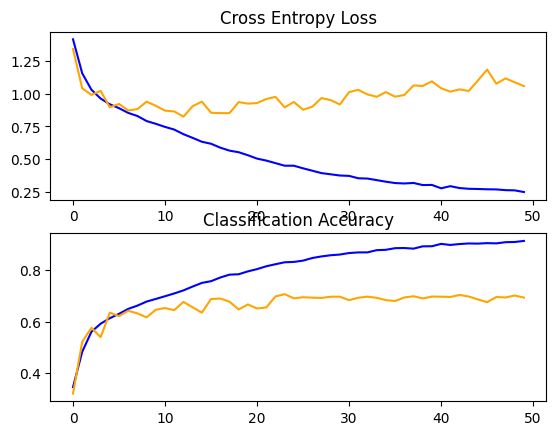

In [10]:
for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

In [12]:
model.save('moodmodel.h5')

In [14]:
model = load_model('moodmodel.h5')

In [15]:
_, acc = model.evaluate(validation_generator, verbose=0)
print('> %.3f' % (acc * 100.0))

> 69.293


In [16]:
def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((40,60))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [17]:
mood = ['Angry','Happy','Neutral','Sad']

In [25]:
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def load_model():
    model = tf.keras.models.load_model('moodmodel.h5')
    return model

model = load_model()


In [36]:
filename= 'Angry.jpg'
image = cv2.imread(filename)


In [37]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
mood_labels = ['Angry', 'Happy', 'Neutral', 'Sad']


In [38]:
for (x, y, w, h) in faces:
                roi = image[y:y + h, x:x + w]
                roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)  # Convert to RGB
                roi_pil = Image.fromarray(roi)
                roi_resized = ImageOps.fit(roi_pil, (48, 48))
                roi_array = np.asarray(roi_resized)
                roi_reshaped = roi_array[np.newaxis, ...]

                prediction = model.predict(roi_reshaped)
                label = mood_labels[prediction.argmax()]

                label_position = (x, y - 10)
                cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


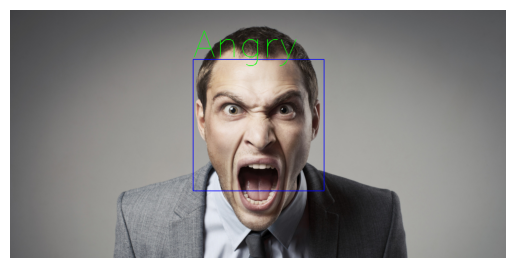

In [39]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [50]:
filename= 'Happy.jpg'
image = cv2.imread(filename)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
mood_labels = ['Angry', 'Happy', 'Neutral', 'Sad']



In [51]:
for (x, y, w, h) in faces:
                roi = image[y:y + h, x:x + w]
                roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)  # Convert to RGB
                roi_pil = Image.fromarray(roi)
                roi_resized = ImageOps.fit(roi_pil, (48, 48))
                roi_array = np.asarray(roi_resized)
                roi_reshaped = roi_array[np.newaxis, ...]

                prediction = model.predict(roi_reshaped)
                label = mood_labels[prediction.argmax()]

                label_position = (x, y - 10)
                cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


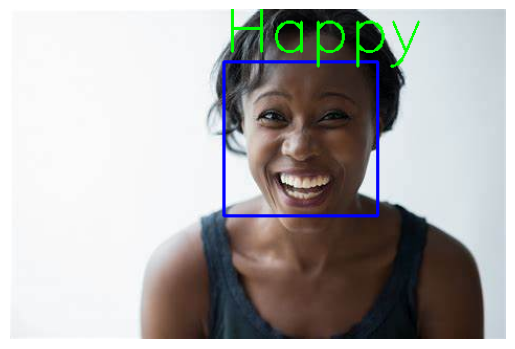

In [52]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [76]:
filename= 'im8.png'
image = cv2.imread(filename)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
mood_labels = ['Angry', 'Happy', 'Neutral', 'Sad']

